In [1]:
from nilmtk.dataset_converters import convert_redd
from nilmtk import DataSet
from nilmtk.utils import print_dict
import nilmtk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(np.__version__)
print(pd.__version__)

1.19.5
0.25.3


# REDD Exploration

In [3]:
# Convert the REDD format:
# convert_redd("../data/redd/low_freq", "../data/redd/redd_low.h5")
# convert_redd("../data/redd/high_freq", "../data/redd/redd_high.h5")

In [4]:
redd_low = DataSet('../data/redd/redd_low.h5')

In [5]:
print_dict(redd_low.metadata)

In [6]:
print_dict(redd_low.buildings)

## Proportion of Energy submetered for all Buildings

In [7]:
x_vals = []
y_vals = []
for i in range(1,len(redd_low.buildings)+1):
    x_vals.append("Building_" + str(i))
    
    cur_elec = redd_low.buildings[i].elec
    y_vals.append(cur_elec.proportion_of_energy_submetered())

Running MeterGroup.proportion_of_energy_submetered...
Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

/Users/ravi/opt/anaconda3/envs/dsci560c/lib/python3.8/site-packages/nilmtk/metergroup.py:939: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warnings.warn("As a quick implementation we only get Good Sections from"
/Users/ravi/opt/anaconda3/envs/dsci560c/lib/python3.8/site-packages/nilmtk/electric.py:304: UserWarning: No shared AC types.  Using 'active' for submeter and 'apparent' for other.
  warn("No shared AC types.  Using '{:s}' for submeter"


Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=1, building=1, dataset='REDD') ...   Running MeterGroup.proportion_of_energy_submetered...
Calculating total_energy for ElecMeterID(instance=2, building=2, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=2, dataset='REDD') ...    total_energy for ElecMeterID(instance=1, building=2, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=2, dataset='REDD') ...   Running MeterGroup.proportion_of_energy_submetered...
Calculating total_energy for ElecMeterID(instance=2, building=3, dataset='REDD') ...   Running MeterGroup.proportion_of_energy_submetered...
Calculating total_energy for ElecMeterID(instance=2, building=4, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=4, dataset='REDD') ...    total_energy for ElecMeterID(inst

In [8]:
print(x_vals)
print(y_vals)

['Building_1', 'Building_2', 'Building_3', 'Building_4', 'Building_5', 'Building_6']
[0.7599031850888346, 0.652525752001292, 0.8861404339556151, 0.759933996325304, 0.6792878096596882, 0.5866958938347494]


<BarContainer object of 6 artists>

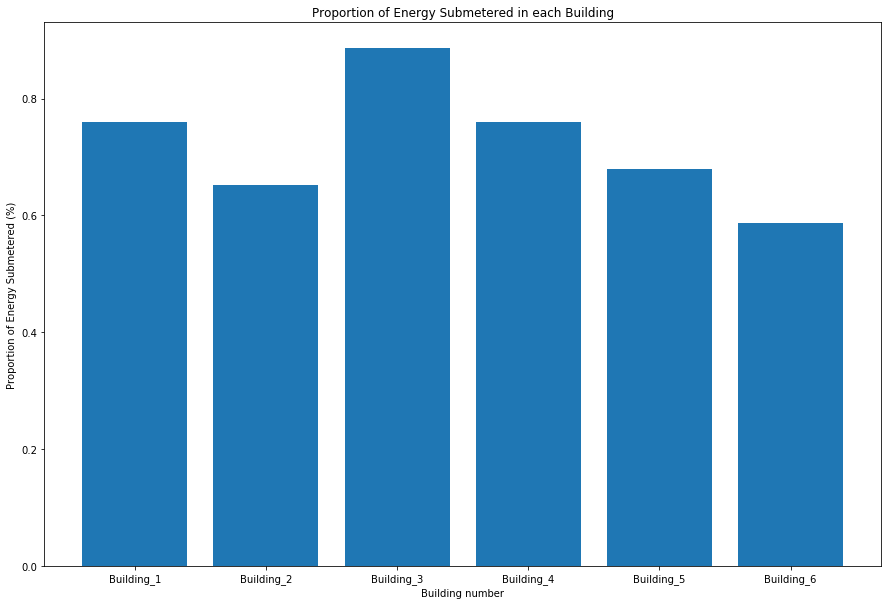

In [9]:
plt.figure(figsize=(15,10))
plt.title("Proportion of Energy Submetered in each Building")
plt.xlabel("Building number")
plt.ylabel("Proportion of Energy Submetered (%)")
plt.bar(x_vals, height=y_vals)

## Total Energy consumed by all Buildings

In [10]:
x_vals_buildings = []
y_vals_energy = []
y_vals_num_meters = []
for i in range(1,len(redd_low.buildings)+1):
    x_vals_buildings.append("Building_" + str(i))
    
    cur_elec = redd_low.buildings[i].elec
    y_vals_energy.append(cur_elec.mains().total_energy())
    y_vals_num_meters.append(len(cur_elec.submeters().meters))

Calculating total_energy for ElecMeterID(instance=2, building=6, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=4, dataset='REDD') ...   

In [11]:
print(x_vals_buildings)
print(y_vals_energy)
print(y_vals_num_meters)

['Building_1', 'Building_2', 'Building_3', 'Building_4', 'Building_5', 'Building_6']
[apparent    167.766283
dtype: float64, apparent    77.222991
dtype: float64, apparent    182.434604
dtype: float64, apparent    163.92996
dtype: float64, apparent    55.605319
dtype: float64, apparent    211.022592
dtype: float64]
[16, 9, 19, 17, 22, 14]


<BarContainer object of 6 artists>

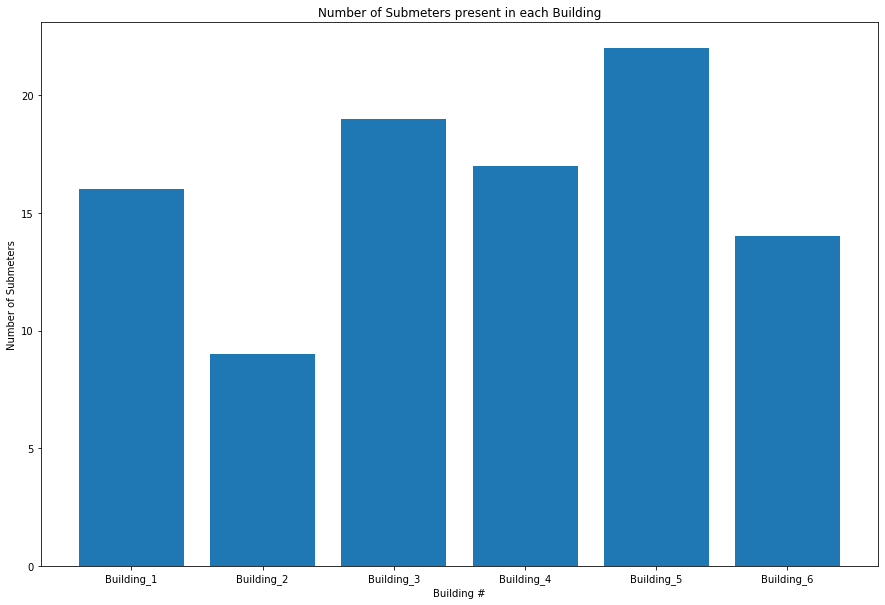

In [12]:
plt.figure(figsize=(15,10))
plt.title("Number of Submeters present in each Building")
plt.xlabel("Building #")
plt.ylabel("Number of Submeters")
plt.bar(x_vals_buildings, height=y_vals_num_meters)

<BarContainer object of 6 artists>

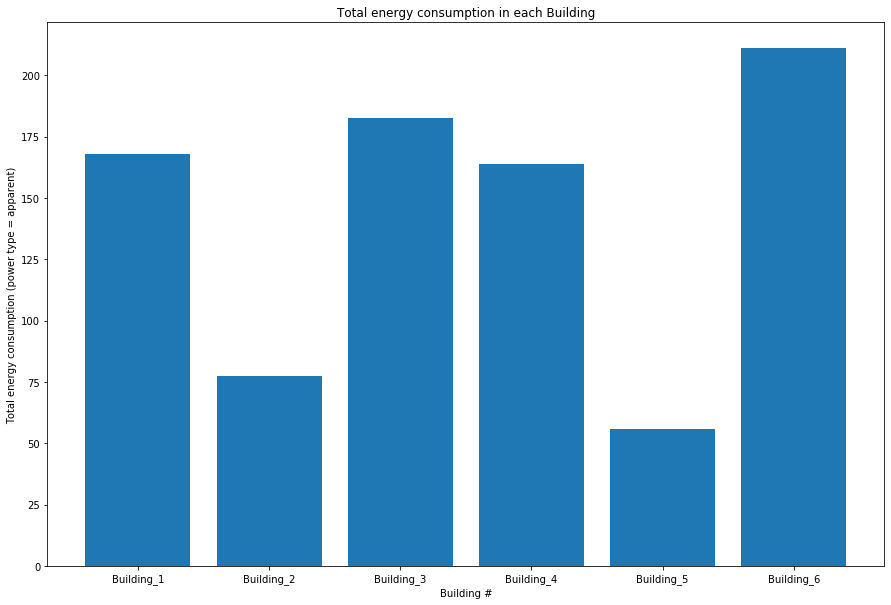

In [13]:
plt.figure(figsize=(15,10))
plt.title("Total energy consumption in each Building")
plt.xlabel("Building #")
plt.ylabel("Total energy consumption (power type = apparent)")
y_vals_energy_watt = [y["apparent"] for y in y_vals_energy]
plt.bar(x_vals_buildings, height=y_vals_energy_watt)

## Analysis of Building 1:

In [14]:
elec_1 = redd_low.buildings[1].elec

In [15]:
print(elec_1)

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

In [16]:
elec_1.nested_metergroups()

[MeterGroup(meters=
   ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
   ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
 ),
 MeterGroup(meters=
   ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
   ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
 )]

In [17]:
elec_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [18]:
elec_1.mains().power_series_all_data().head()

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


2011-04-18 09:22:09-04:00    342.820007
2011-04-18 09:22:10-04:00    344.559998
2011-04-18 09:22:11-04:00    345.140015
2011-04-18 09:22:12-04:00    341.679993
2011-04-18 09:22:13-04:00    341.029999
Freq: S, Name: (power, apparent), dtype: float32

In [19]:
elec_1.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...
Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=1, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=1, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=1, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

0.7599031850888346

In [20]:
elec_1.mains().total_energy()

Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

apparent    167.766283
dtype: float64

In [21]:
print("Number of submeters = ", len(elec_1.submeters().meters))

Number of submeters =  16


In [22]:
energy_per_meter = elec_1.submeters().energy_per_meter()

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

In [23]:
energy_per_meter.loc["active"]

(5, 1, REDD)                         44.750925
(6, 1, REDD)                         19.920875
(7, 1, REDD)                         16.786282
(8, 1, REDD)                         22.939649
(9, 1, REDD)                         30.734511
(11, 1, REDD)                        16.890262
(12, 1, REDD)                         5.221226
(13, 1, REDD)                         0.096302
(14, 1, REDD)                         0.411592
(15, 1, REDD)                         4.507334
(16, 1, REDD)                         2.256583
(17, 1, REDD)                        18.288595
(18, 1, REDD)                        11.811224
(19, 1, REDD)                         0.000085
(((3, 1, REDD), (4, 1, REDD)),)       8.817960
(((10, 1, REDD), (20, 1, REDD)),)    32.614809
Name: active, dtype: float64

### Energy Consumption by Applicances Breakdown

In [24]:
fraction = elec_1.submeters().fraction_per_meter().dropna()

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

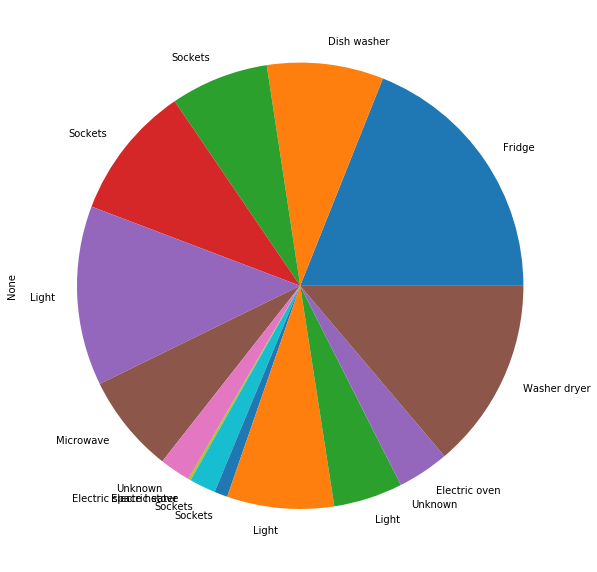

In [25]:
labels = elec_1.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

### Wiring Diagram for Meters connections

(<networkx.classes.digraph.DiGraph at 0x7fdc3c29cc70>,
 <matplotlib.axes._axes.Axes at 0x7fdc3c2b3d90>)

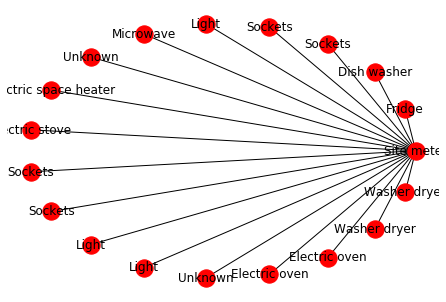

In [26]:
elec_1.draw_wiring_graph()

### Energy Consumption by Appliances in a day

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


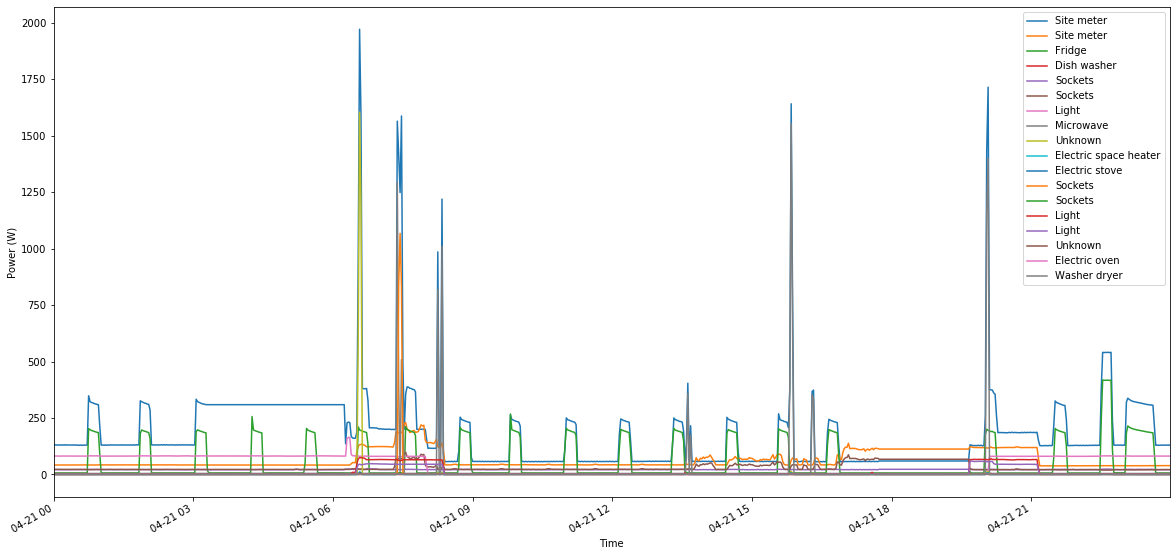

In [27]:
plt.rcParams["figure.figsize"] = (20,10)
redd_low.set_window(start='2011-04-21', end='2011-04-22')
elec_1.plot();
plt.xlabel("Time");

### Appliances On/off states in a day (filtered with power >= 10W)

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


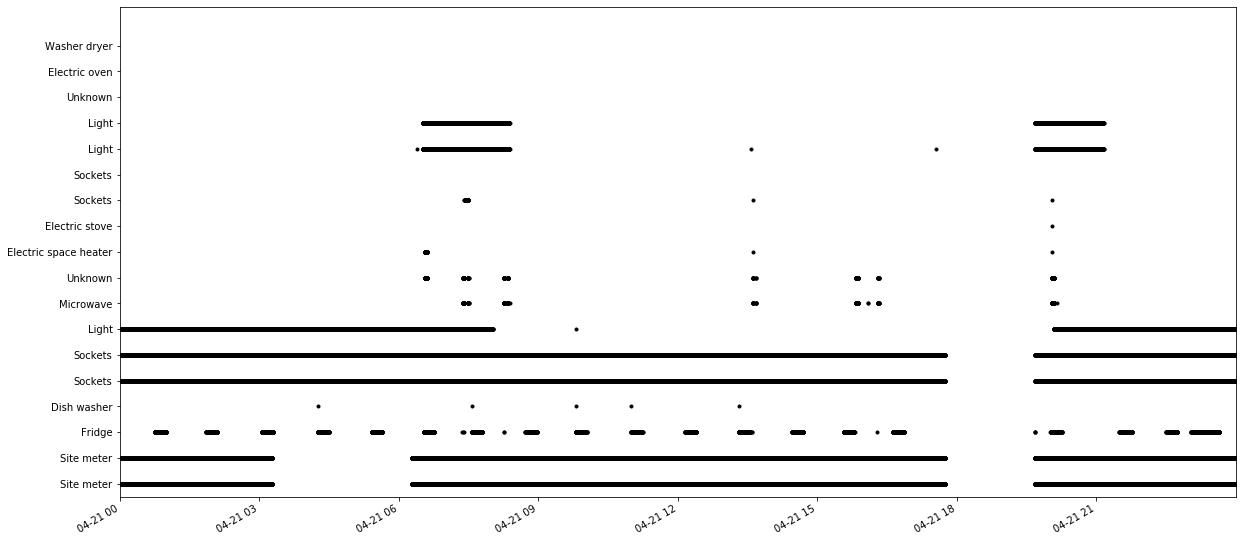

In [28]:
redd_low.set_window(start='2011-04-21', end='2011-04-22')
plt.rcParams["figure.figsize"] = (20,10)
elec_1.plot_when_on(on_power_threshold = 10)

In [29]:
redd_low.set_window()
fridges_restricted = nilmtk.global_meter_group.select_using_appliances(type='fridge')
daily_energy = pd.Series([meter.average_energy_per_period(offset_alias='D') 
                          for meter in fridges_restricted.meters])

# daily_energy.plot(kind='hist');
# plt.title('Histogram of daily fridge energy');
# plt.xlabel('energy (kWh)');
# plt.ylabel('occurences');
# plt.legend().set_visible(False)

daily_energy

0    active    1.349099
dtype: float64
1    active    1.914858
dtype: float64
2    active    1.139238
dtype: float64
3    active    1.669544
dtype: float64
4    active    1.853019
dtype: float64
dtype: object

# REFIT Exploration